**IMAGE ALIGNMENT AND REGISTRATION**

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
refFilename = "original.jpg"
print("Reading reference image :" , refFilename)
im1 = cv2.imread(refFilename , cv2.IMREAD_COLOR)
im1 = cv2.cvtColor(im1 , cv2.COLOR_BGR2RGB)

imFilename = "scan form.jpg"
print("Reading  image to align  :" , imFilename)
im2 = cv2.imread(imFilename , cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2 , cv2.COLOR_BGR2RGB)

Reading reference image : original.jpg
Reading  image to align  : scan form.jpg


Text(0.5, 1.0, 'scan form')

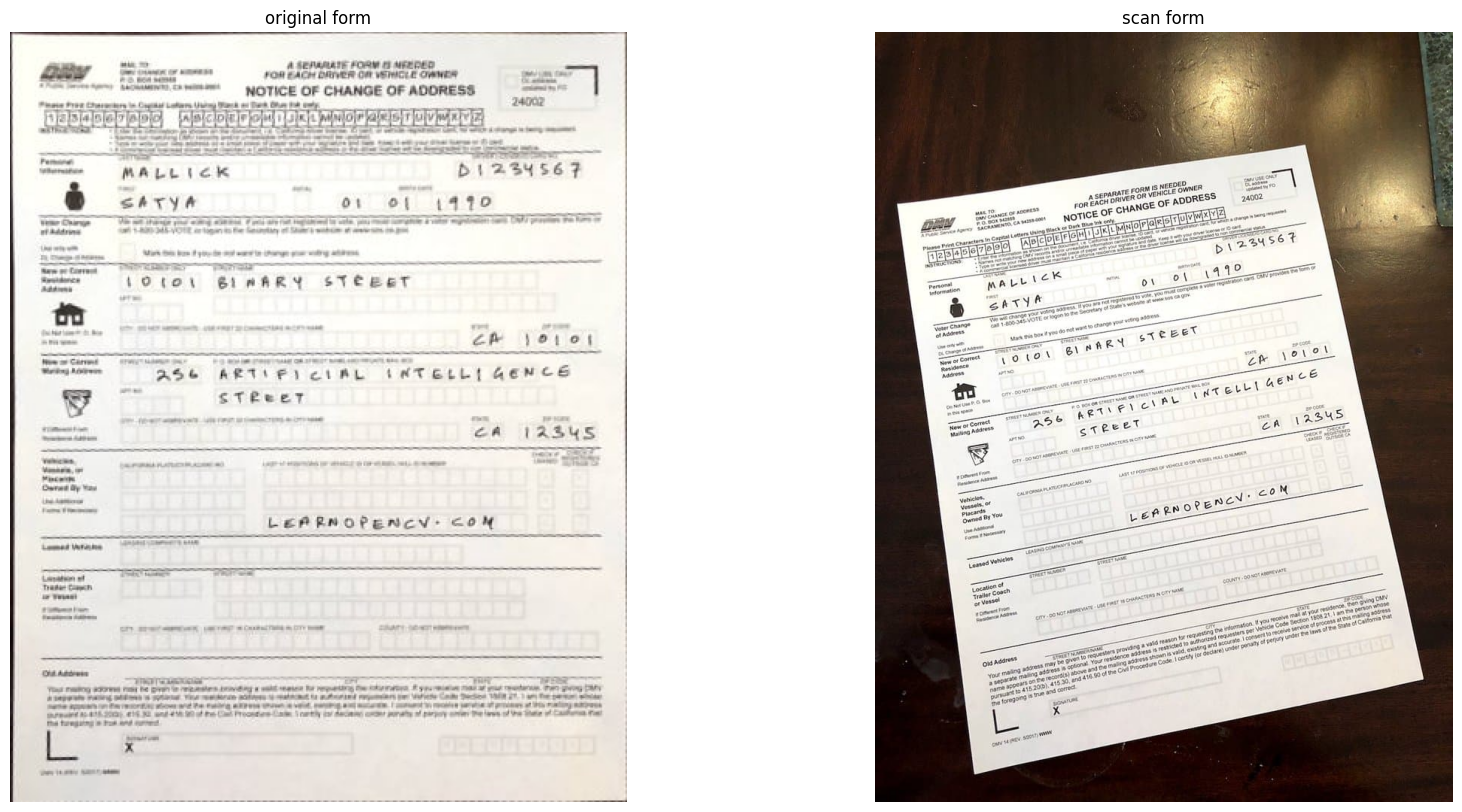

In [18]:
plt.figure(figsize =[20,10]);
plt.subplot(121); plt.axis('off'); plt.imshow(im1);plt.title("original form")
plt.subplot(122); plt.axis('off'); plt.imshow(im2);plt.title("scan form")

In [19]:
#converting in garyscale
im1_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
#detecting ORB features
MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(im1_gray,None)
keypoints2, descriptors2 = orb.detectAndCompute(im2_gray,None)
im1_display = cv2.drawKeypoints(im1, keypoints1, outImage = np.array([]),color = (255,0,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS )
im2_display = cv2.drawKeypoints(im2, keypoints1, outImage = np.array([]),color = (255,0,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS )

Text(0.5, 1.0, 'scan form')

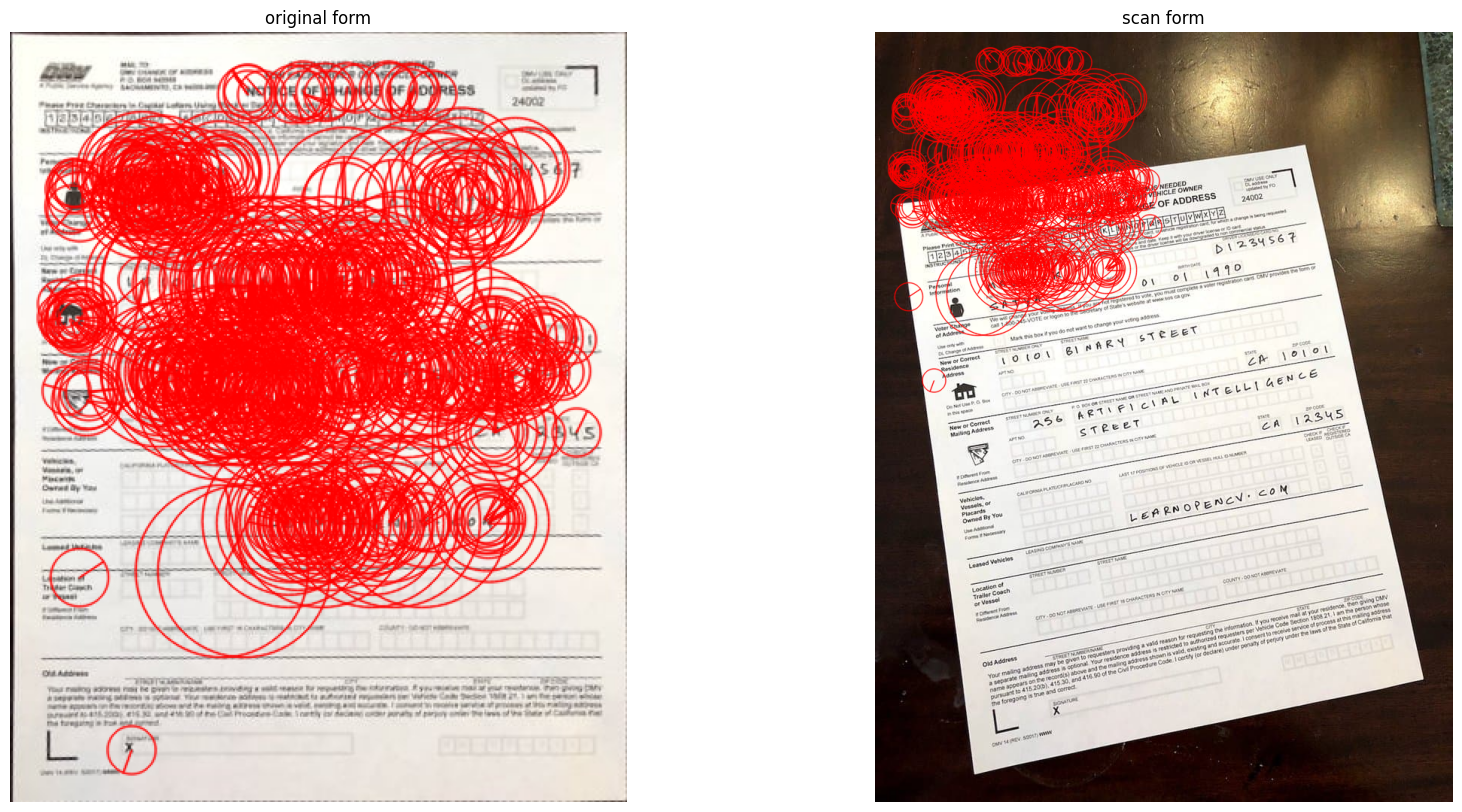

In [20]:
plt.figure(figsize =[20,10]);
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display);plt.title("original form")
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display);plt.title("scan form")

In [24]:
# key features Matching
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)
# Sorting matches based on distance
matches = sorted(matches, key=lambda x: x.distance)
# Remove not good matches
numGoodMatches = int(len(matches) * 0.1)
goodMatches = matches[:numGoodMatches]


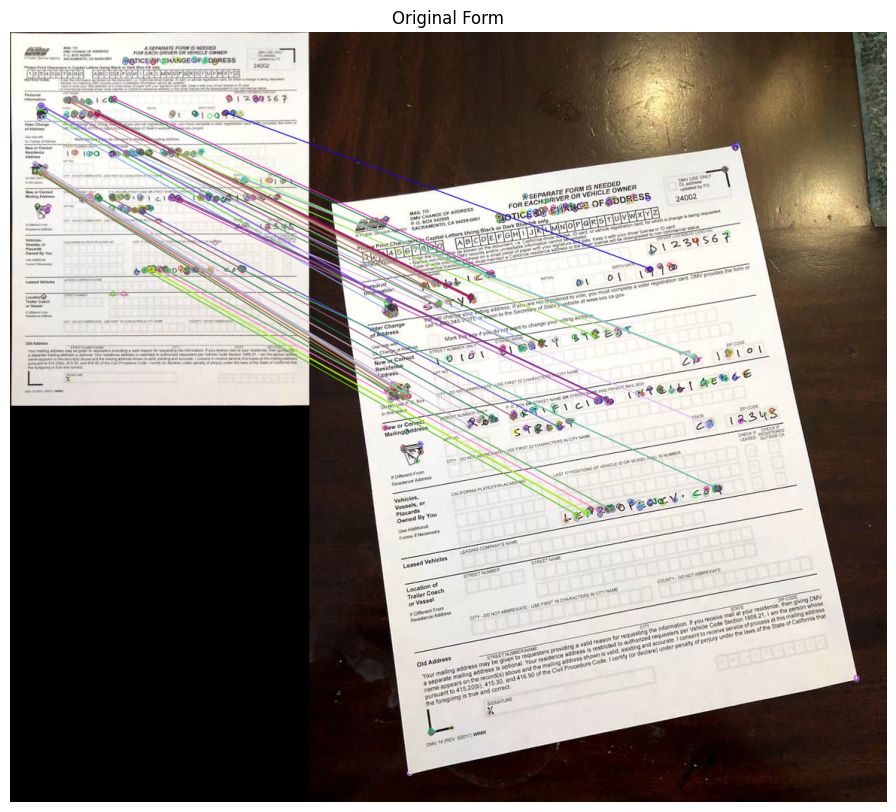

In [27]:
im_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, goodMatches, None)
plt.figure(figsize=[40, 10])
plt.imshow(im_matches)
plt.axis('off')
plt.title('Original Form')
plt.show()

In [30]:
points1 = np.zeros((len(matches),2),dtype = np.float32)
points2 = np.zeros((len(matches),2),dtype = np.float32)
for i, match in enumerate(matches):
  points1[i, :]= keypoints1[match.queryIdx].pt
  points2[i, :]= keypoints2[match.trainIdx].pt

h,mask = cv2.findHomography(points2, points1, cv2.RANSAC)

Text(0.5, 1.0, 'scan form')

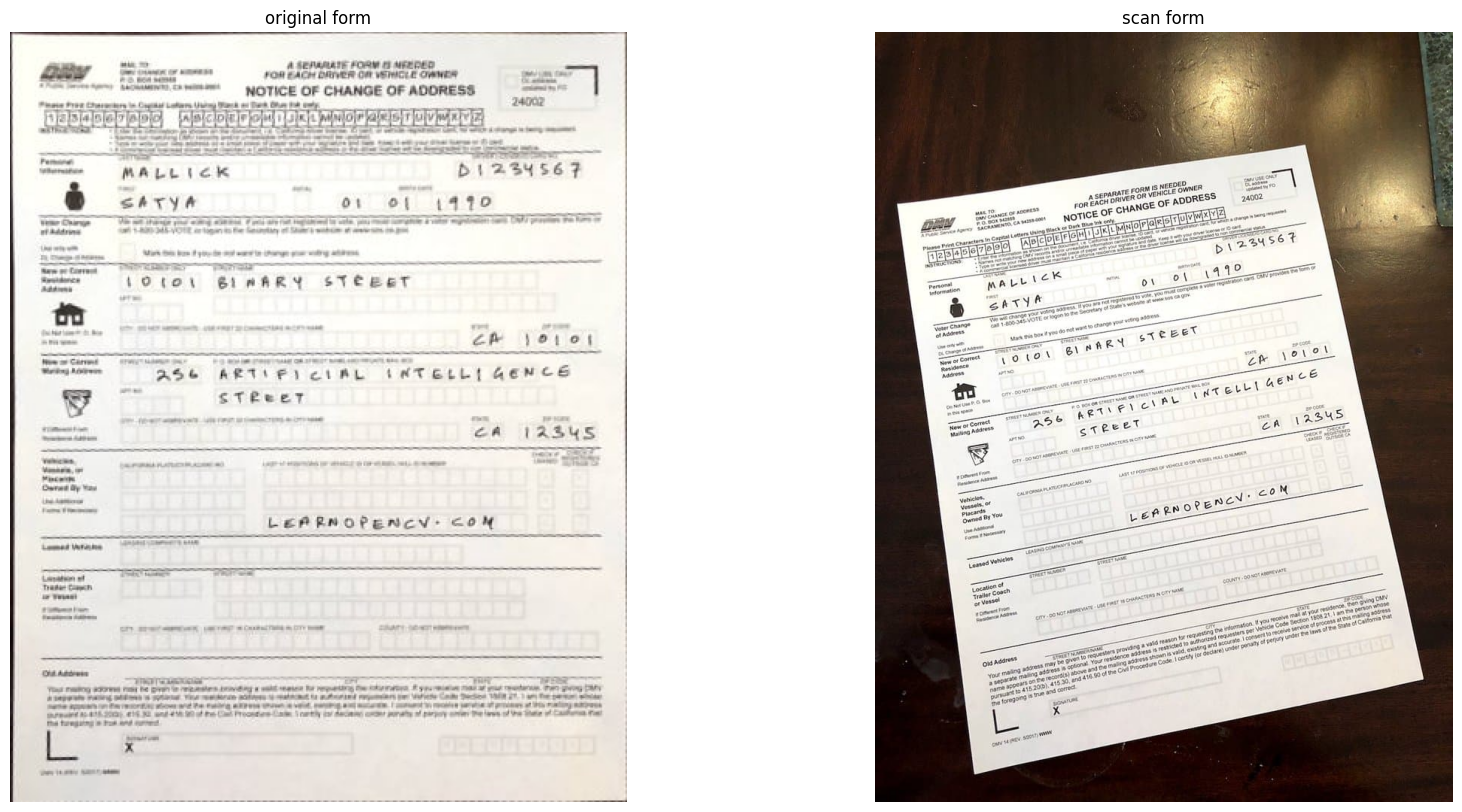

In [34]:
#wraping iamge by using homogarpy
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))
plt.figure(figsize =[20,10]);
plt.subplot(121); plt.imshow(im1); plt.axis('off'); plt.title("original form")
plt.subplot(122); plt.imshow(im2); plt.axis('off'); plt.title("scan form")